In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Case 2: Black-Scholes formula for Unit-Linked

Asha de Meij (i6254733)

**Task:** Derive the closed-form expression for the price at t=0 for the  unit-linked contract with a 0% guarantee.



In [8]:
r = 0.01       
sigma = 0.15   
T = 10          
t = 0          
S0 = 100 
n = 100
guarantee = 100

In [9]:
def get_optionPrice(r, sigma, T, guarantee, n):

    # Formulas from slides
    dt = T/n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u

    R_dt = np.exp(r*dt) # growth factor at each time step
    p = (R_dt - d) / (u - d) # Risk-neutral probability
    q = 1 - p


    # Stock price calculations
    stockValues = np.zeros((n+1, n+1))
    stockValues[0,0] = 100 # Initial value
    
    for i in range(1,n+1):
        stockValues[i,0] = u*stockValues[i-1,0]
        for j in range(1,i+1):
           stockValues[i,j] = d*stockValues[i-1,j-1]



    # contract price calculations
    contractPrice = np.zeros((n+1, n+1))

    for i in range(n+1):
         contractPrice[n,i] = np.maximum(guarantee,stockValues[n,i]) 
         
    for i in range(n - 1, -1, -1):
        for j in range(i+1):
            contractPrice[i,j] = (1/R_dt)*(p*contractPrice[i+1,j] + q*contractPrice[i+1,j+1])

    initialPrice = contractPrice[0,0]
       
    return initialPrice

Price of the Contract:  113.43953782342845


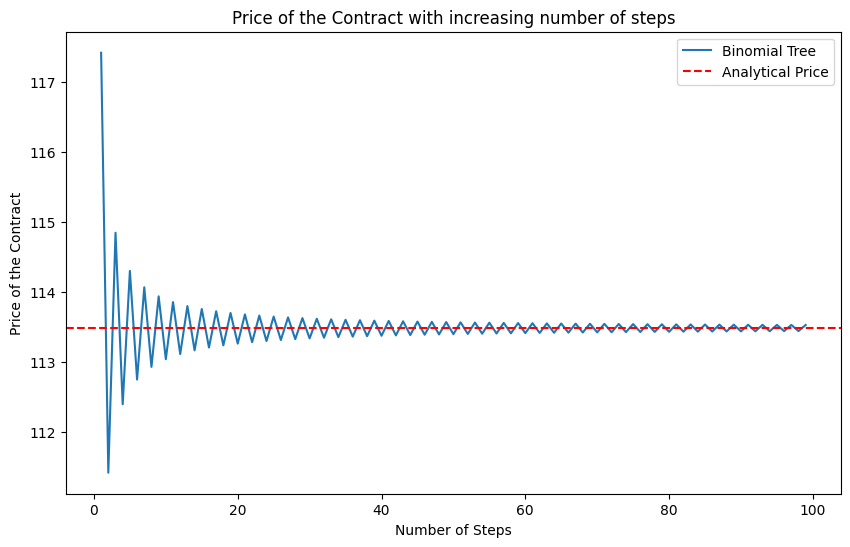

In [10]:
step_counts = range(1, 100)
prices = [get_optionPrice(r, sigma, T, guarantee, n) for n in step_counts]

print("Price of the Contract: ", get_optionPrice(r, sigma, T, guarantee, n)) 

analyticalPrice = 113.482


# plt.figure(figsize=(10, 6))
# plt.plot(step_counts, prices, label='Option Price')
# plt.xlabel('Number of Steps')
# plt.ylabel('Price of the Contract')
# plt.title('Price of the Contract as a Function of Number of Steps')
# plt.legend()
# plt.show()

plt.figure(figsize=(10, 6))
plt.plot(step_counts, prices, label='Binomial Tree')
plt.axhline(y=analyticalPrice, color='red', linestyle='--', label='Analytical Price')
plt.xlabel('Number of Steps')
plt.ylabel('Price of the Contract')
plt.title('Price of the Contract with increasing number of steps')
plt.legend()
plt.show()

In [11]:
d1 = (np.log(S0 / 100) - (r - 0.5 * sigma ** 2) * (T - t)) / (sigma * np.sqrt(T - t))
d2 = (np.log(100 / S0) + (r + 0.5 * sigma ** 2) * (T - t)) / (sigma * np.sqrt(T - t))

Nd1 = norm.cdf(d1)
Nd2 = norm.cdf(d2)

C = S0 * Nd2 + 100 * np.exp(-r * (T - t)) * Nd1

print(f"Option Price: {C}")

Option Price: 113.48497644043974


# Delta-hedge